## An Introduction to Understanding Tyre Degredation in F1 🏎️

In [210]:
# Fast F1 Deps
import fastf1

# Data Deps
import pandas as pd

# Data Visualisation Deps
import matplotlib.pyplot as plt
import seaborn as sns

# Auxilary Deps
from pathlib import Path

### Global Setup

In [211]:
jeddah_2025 = fastf1.get_event(year=2025, gp="jeddah")
jeddah_2025

RoundNumber                                                    5
Country                                             Saudi Arabia
Location                                                  Jeddah
OfficialEventName    FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025
EventDate                                    2025-04-20 00:00:00
EventName                               Saudi Arabian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2025-04-18 16:30:00+03:00
Session1DateUtc                              2025-04-18 13:30:00
Session2                                              Practice 2
Session2Date                           2025-04-18 20:00:00+03:00
Session2DateUtc                              2025-04-18 17:00:00
Session3                                              Practice 3
Session3Date                           2025-04-19 16:30:00+03:00
Session3DateUtc          

### Loading the Race Session

In [212]:
jeddah_race = jeddah_2025.get_race()

# Loading the data from the race
jeddah_race.load(
    laps=True,
    telemetry=True,
    weather=True,
    messages=True
)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
logger      WARNING 	Failed to load telemetry data!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '

### Loading the Laps from the Race

In [213]:
# Accessing the race laps
race_laps = jeddah_race.laps

# Dropping the unnecessary cols
drop_cols = [
    "Time", "Sector1SessionTime", "Sector2SessionTime", "Sector3SessionTime", 
    "LapStartTime", "LapStartDate", "Team", "FastF1Generated", "IsAccurate", "DeletedReason"
]
race_laps = race_laps.drop(drop_cols, axis=1)
race_laps.head()


,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted
0,PIA,81,0 days 00:02:04.986000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.518000,0 days 00:00:58.921000,...,304.0,163.0,145.0,False,MEDIUM,1.0,True,124,2.0,False
1,PIA,81,NaT,2.0,1.0,NaT,NaT,0 days 00:01:08.447000,0 days 00:00:49.209000,0 days 00:00:46.412000,...,175.0,269.0,226.0,False,MEDIUM,2.0,True,4,2.0,False
2,PIA,81,NaT,3.0,1.0,NaT,NaT,0 days 00:00:56.071000,0 days 00:00:46.270000,0 days 00:01:12.862000,...,145.0,295.0,82.0,False,MEDIUM,3.0,True,41,3.0,False
3,PIA,81,0 days 00:01:34.247000,4.0,1.0,NaT,NaT,0 days 00:00:34.829000,0 days 00:00:29.607000,0 days 00:00:29.811000,...,300.0,294.0,307.0,True,MEDIUM,4.0,True,1,2.0,False
4,PIA,81,0 days 00:01:33.418000,5.0,1.0,NaT,NaT,0 days 00:00:34.522000,0 days 00:00:29.411000,0 days 00:00:29.485000,...,303.0,304.0,325.0,True,MEDIUM,5.0,True,1,2.0,False


In [214]:
# Changing the Lap and Sector Times from TimeDelta to Seconds
lap_cols = ["LapTime", "PitOutTime", "PitInTime", "Sector1Time", "Sector2Time", "Sector3Time"]
for col in lap_cols:
    race_laps[col] = race_laps[col].apply(lambda x: x.total_seconds())

# Revised DataFrame
race_laps.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted
0,PIA,81,124.986,1.0,1.0,NaN,NaN,NaN,29.518,58.921,...,304.0,163.0,145.0,False,MEDIUM,1.0,True,124,2.0,False
1,PIA,81,NaN,2.0,1.0,NaN,NaN,68.447,49.209,46.412,...,175.0,269.0,226.0,False,MEDIUM,2.0,True,4,2.0,False
2,PIA,81,NaN,3.0,1.0,NaN,NaN,56.071,46.270,72.862,...,145.0,295.0,82.0,False,MEDIUM,3.0,True,41,3.0,False
3,PIA,81,94.247,4.0,1.0,NaN,NaN,34.829,29.607,29.811,...,300.0,294.0,307.0,True,MEDIUM,4.0,True,1,2.0,False
4,PIA,81,93.418,5.0,1.0,NaN,NaN,34.522,29.411,29.485,...,303.0,304.0,325.0,True,MEDIUM,5.0,True,1,2.0,False


### Important Pointers
- A maximum of 110 Kg of fuel at the start of the race.
- 10 Kg of fuel load = 0.3s/lap.
- Fuel Flow of 100 Kg/hr = 27.8gm per sec.

### Analysing the Tyre Degredation for a Driver

In [215]:
ver_laps = race_laps.pick_drivers("VER")
ver_quick_laps = ver_laps.pick_quicklaps()
ver_quick_laps.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted
53,VER,1,93.831,4.0,1.0,NaN,NaN,34.345,29.659,29.827,...,294.0,291.0,298.0,True,MEDIUM,4.0,True,1,1.0,False
54,VER,1,93.716,5.0,1.0,NaN,NaN,34.376,29.547,29.793,...,295.0,292.0,299.0,True,MEDIUM,5.0,True,1,1.0,False
55,VER,1,93.564,6.0,1.0,NaN,NaN,34.330,29.438,29.796,...,297.0,292.0,301.0,True,MEDIUM,6.0,True,1,1.0,False
56,VER,1,93.511,7.0,1.0,NaN,NaN,34.250,29.473,29.788,...,296.0,292.0,302.0,True,MEDIUM,7.0,True,1,1.0,False
57,VER,1,93.891,8.0,1.0,NaN,NaN,34.507,29.479,29.905,...,296.0,292.0,301.0,False,MEDIUM,8.0,True,1,1.0,False


### Adding in the fuel load correction for laptime

In [216]:
# Estimate for saving fuel driven laptime with LiCo during the race and other management
fuel_load = 105

# Fuel Flow Rate (in Kg)
ffr = 27.8 * 1e-3

# Fuel Load to Lap Time Constant (in sec) for 10kg of Fuel
fl_const = 0.3 * 1e-1

# ICE Contribution in the Laptime
ice_const = 0.8

# Copy of the original data
ver_corrected_laps = ver_quick_laps.copy()

# Lap Fuel Burn Estimate per stint
ver_corrected_laps["LapFuelBurnt"] = ver_corrected_laps["LapTime"] * ffr * ice_const
ver_corrected_laps["CumFuelBurntByStint"] = ver_corrected_laps[["LapFuelBurnt", "Stint"]].groupby("Stint").cumsum()

# Correcting the Lap Times to be independent of Fuel
ver_corrected_laps["FuelAwareLapTime"] = ver_corrected_laps["LapTime"] - (fuel_load - ver_corrected_laps["LapFuelBurnt"]) * fl_const
ver_corrected_laps.head()

,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,LapFuelBurnt,CumFuelBurntByStint,FuelAwareLapTime
53,VER,1,93.831,4.0,1.0,NaN,NaN,34.345,29.659,29.827,...,True,MEDIUM,4.0,True,1,1.0,False,2.086801,2.086801,90.743604
54,VER,1,93.716,5.0,1.0,NaN,NaN,34.376,29.547,29.793,...,True,MEDIUM,5.0,True,1,1.0,False,2.084244,4.171045,90.628527
55,VER,1,93.564,6.0,1.0,NaN,NaN,34.330,29.438,29.796,...,True,MEDIUM,6.0,True,1,1.0,False,2.080863,6.251909,90.476426
56,VER,1,93.511,7.0,1.0,NaN,NaN,34.250,29.473,29.788,...,True,MEDIUM,7.0,True,1,1.0,False,2.079685,8.331593,90.423391
57,VER,1,93.891,8.0,1.0,NaN,NaN,34.507,29.479,29.905,...,False,MEDIUM,8.0,True,1,1.0,False,2.088136,10.419729,90.803644


### Visualisations of the Trends

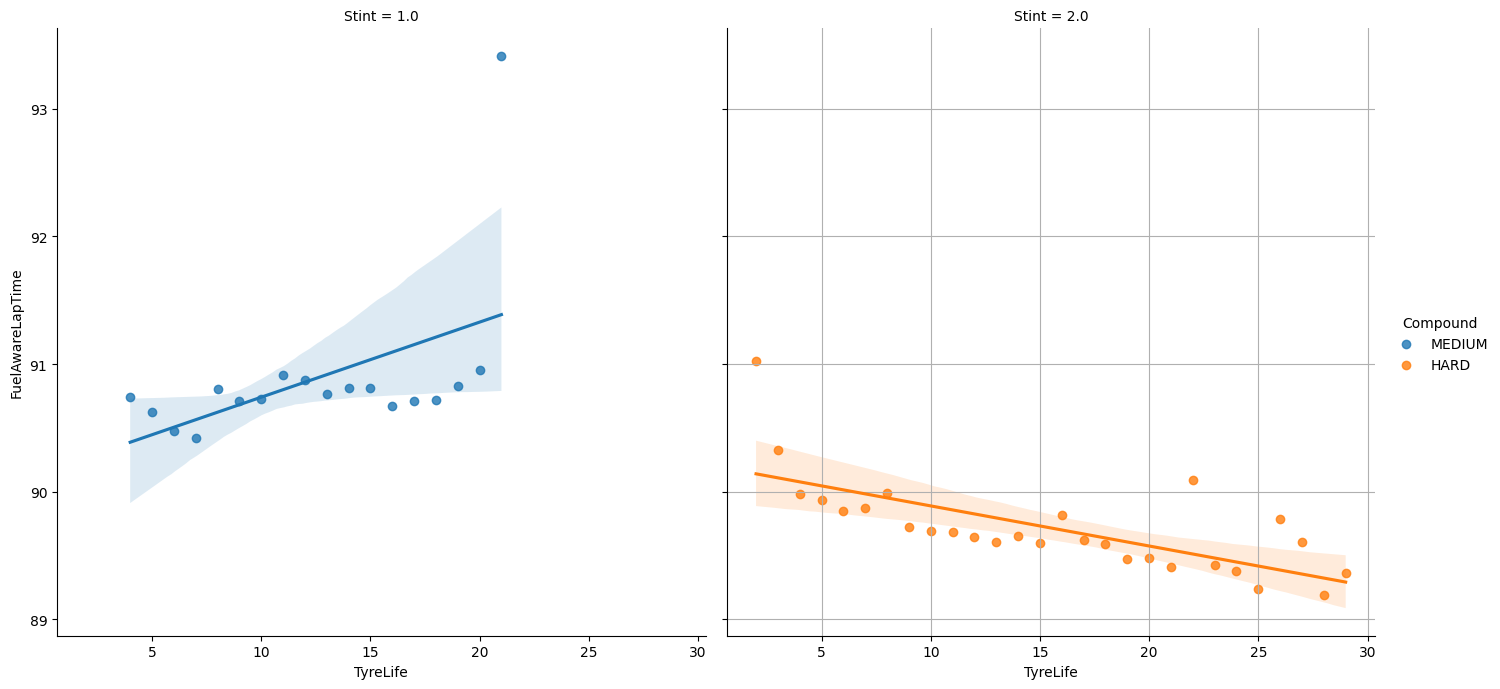

In [ ]:
g_map_act_laptime = sns.FacetGrid(
    data=ver_corrected_laps,
    col="Stint",
    hue="Compound",
    height=7
)

g_map_act_laptime.map(sns.regplot, "TyreLife", "FuelAwareLapTime")
g_map_act_laptime.add_legend()
plt.show()

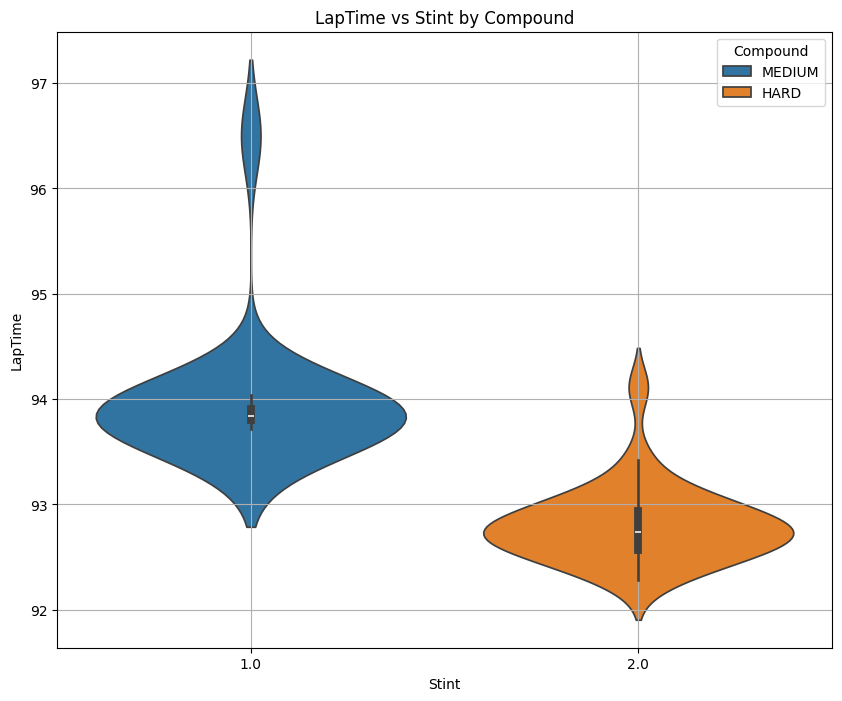

In [103]:
plt.figure(figsize=(10, 8))
plt.title("LapTime vs Stint by Compound")
sns.violinplot(
    data=ver_quick_laps,
    x="Stint",
    y="LapTime",
    hue="Compound"
)
plt.grid()
plt.show()